In [ ]:
#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Reading Dataset

In [2]:
data=pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Missing Values Check

In [ ]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Zero Variance Check

In [ ]:
data.var()

Age                         8.342665e+01
DailyRate                   1.627642e+05
DistanceFromHome            6.569889e+01
Education                   1.048557e+00
EmployeeCount               1.233015e-32
EmployeeNumber              7.205450e+05
EnvironmentSatisfaction     1.194422e+00
HourlyRate                  4.131450e+02
JobInvolvement              5.061470e-01
JobLevel                    1.224899e+00
JobSatisfaction             1.215856e+00
MonthlyIncome               2.215732e+07
MonthlyRate                 5.064564e+07
NumCompaniesWorked          6.237926e+00
PercentSalaryHike           1.339059e+01
PerformanceRating           1.301493e-01
RelationshipSatisfaction    1.168615e+00
StandardHours               0.000000e+00
StockOptionLevel            7.257876e-01
TotalWorkingYears           6.051996e+01
TrainingTimesLastYear       1.661653e+00
WorkLifeBalance             4.989383e-01
YearsAtCompany              3.752154e+01
YearsInCurrentRole          1.312266e+01
YearsSinceLastPr

In [ ]:
# Dropping unwanted columns

In [4]:
data.drop('StandardHours',axis=1,inplace=True) #Variance is zero.

In [5]:
data.drop('EmployeeNumber',axis=1,inplace=True) #EmployeeNumber is an identification column

In [6]:
data.drop('EmployeeCount',axis=1,inplace=True) #Variance is zero

In [7]:
data.drop('Over18',axis=1,inplace=True) #Only one value present hence deleting.

In [8]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [ ]:
# Finding numerical data

In [10]:
numerical_data=[]
for i in data.columns:
    if data[i].dtypes!='object':
        numerical_data.append(i)

In [11]:
numerical_data

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Outlier Detection and Treatment

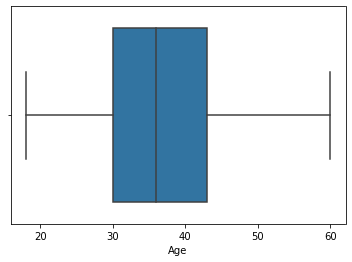

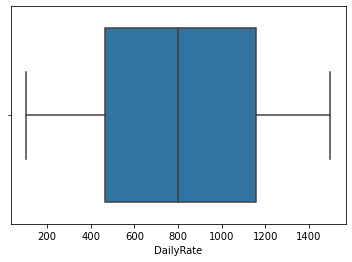

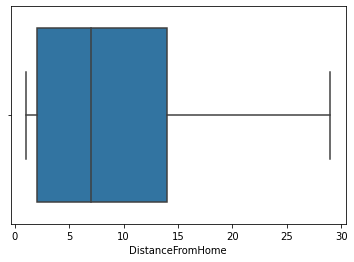

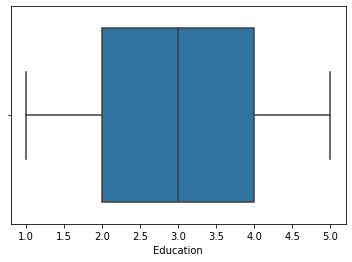

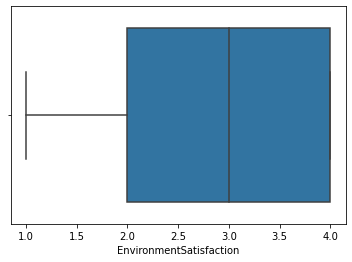

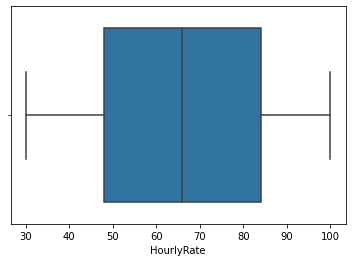

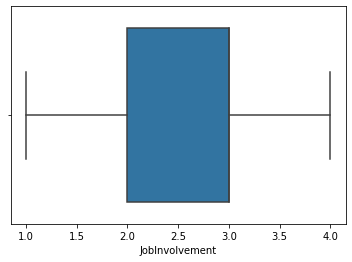

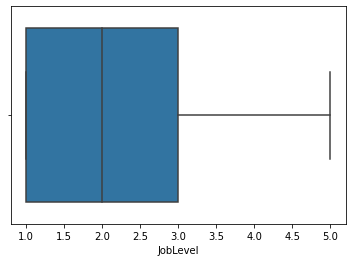

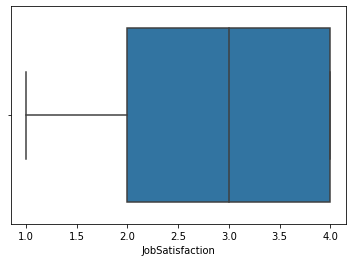

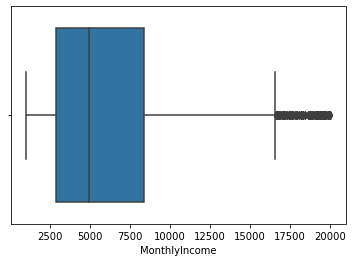

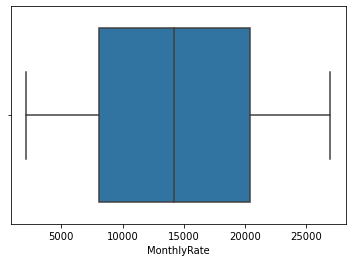

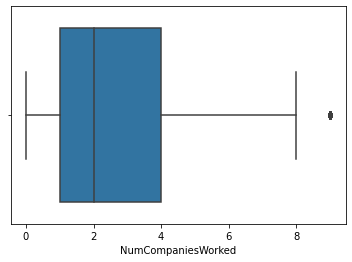

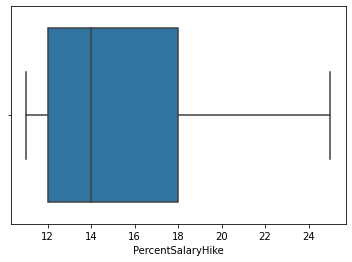

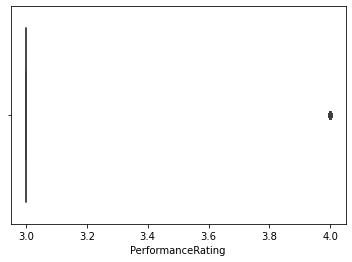

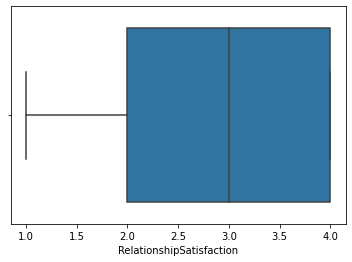

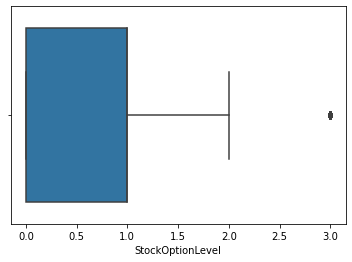

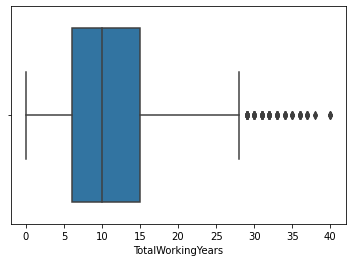

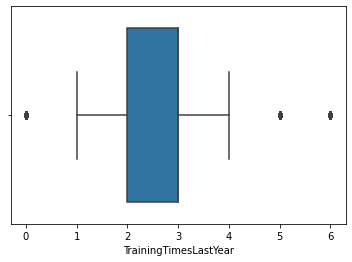

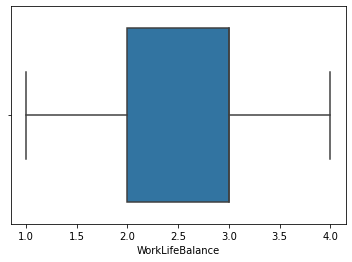

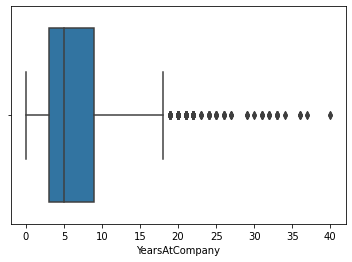

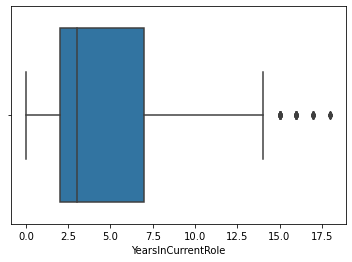

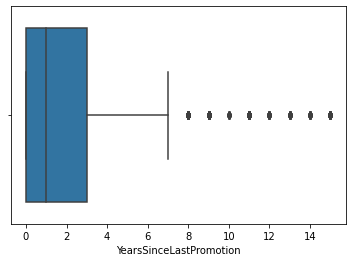

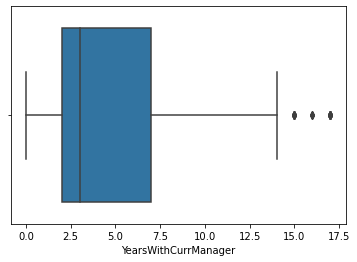

In [ ]:
#Plotting box plot
for i in numerical_data:
    sns.boxplot(x=i,data=data)
    plt.show()

# OUTLIER TREATMENT WITH IQR METHOD


In [12]:
outlier=['MonthlyIncome','TotalWorkingYears','YearsAtCompany',
         'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

In [13]:
#Inter Quartile Range outlier treatment method
for i in data[outlier]:
    q3=data[i].quantile(0.75)
    q1=data[i].quantile(0.25)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    data[i].clip(lower,upper,inplace=True)

# Finding Correlation using Heatmap

<AxesSubplot:>

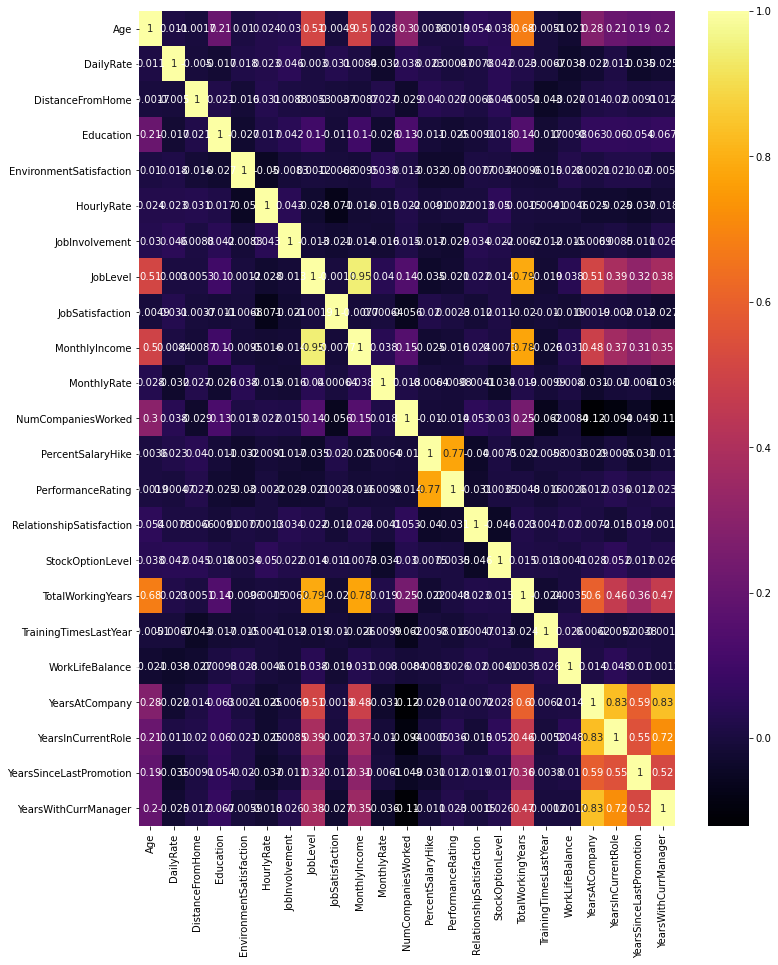

In [ ]:
plt.figure(figsize=(12,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno')

In [ ]:
# Dropping Highly correlated Data

In [14]:
cormat=data.corr()
lst=[]
for i in range(len(cormat.columns)):
    for j in range(i):
        if abs(cormat.iloc[i,j])>0.75:
            colname=cormat.columns[i]
            lst.append(colname)
uncor=data.drop(columns=lst)
result=uncor.columns
print(result)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')


In [15]:
data=data[result] #Uncorrelated columns

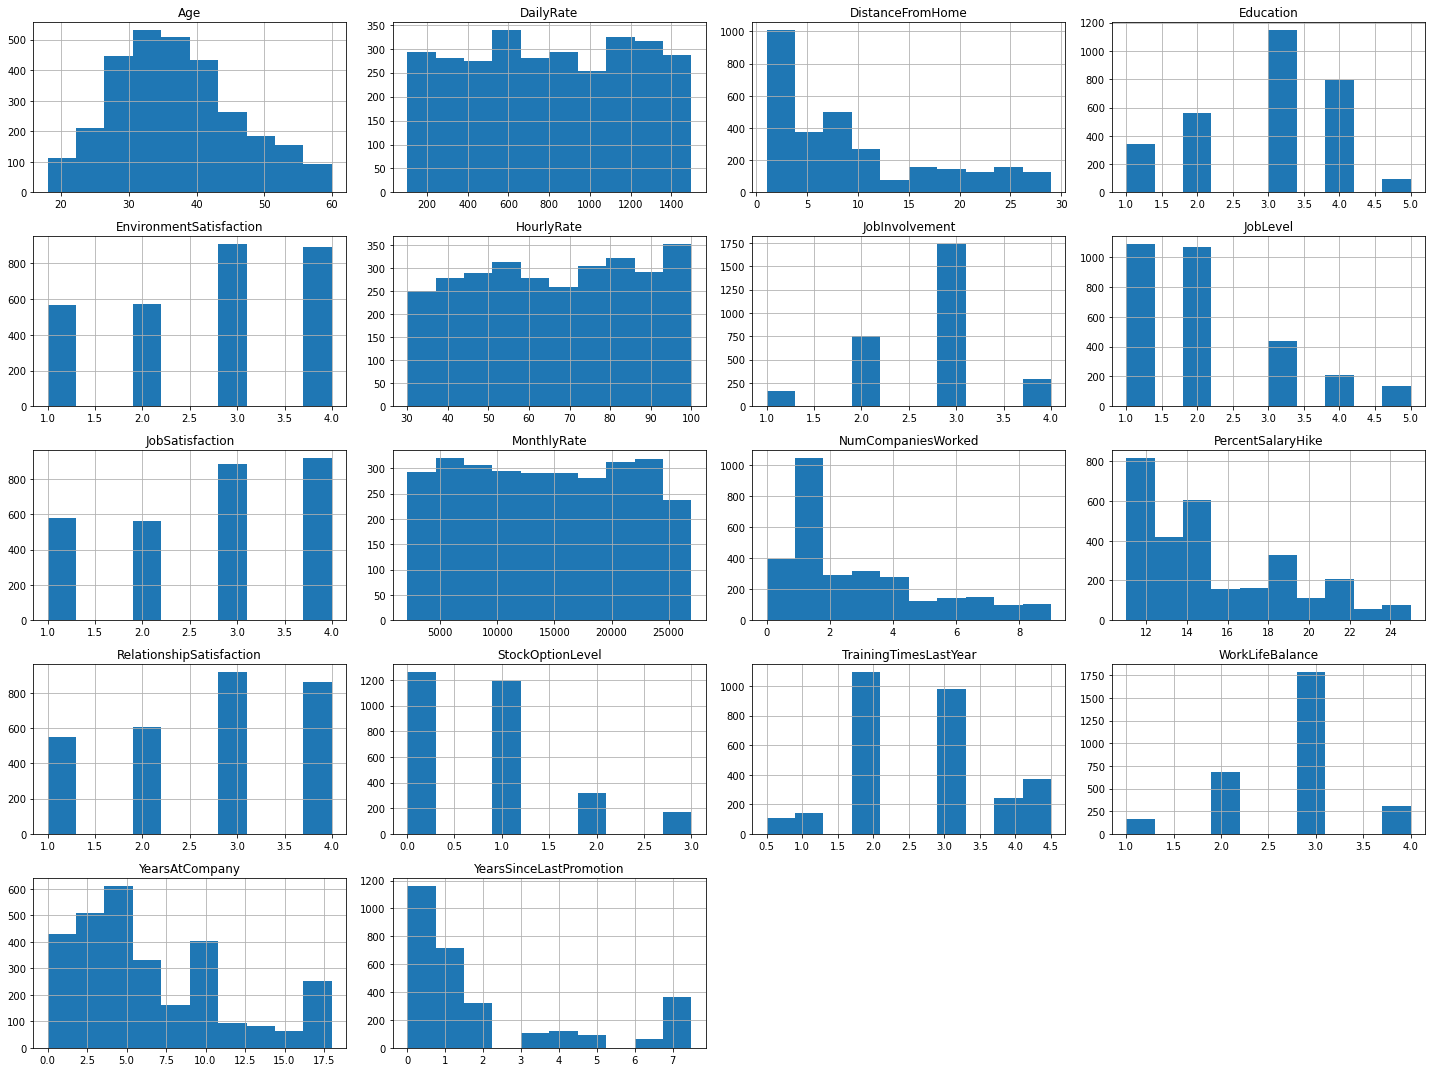

In [ ]:
#Plotting Histogram
data.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [16]:
objectdata = [i for i in data.columns if data[i].dtypes == 'object']
objectdata

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# Exploratary Data Analysis

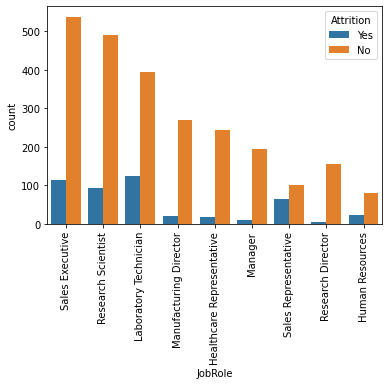

In [ ]:
# What Job Roles are more likely to contribute to attrition?

sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.xticks(rotation=90)
plt.show()


In [ ]:
"""Lab Tech are most likely to leave, we can try to find why is this so?"""

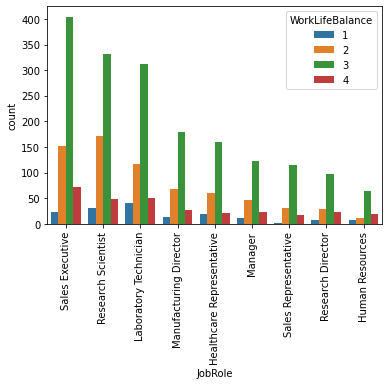

In [ ]:
# Are Lab Tech leaving due to poor work life balance?

sns.countplot(x='JobRole', hue='WorkLifeBalance', data=data)
plt.xticks(rotation=90)
plt.show()


In [ ]:
"""The work-life balance for laboratory technicians is generally rated as poor,
with a significant proportion of employees providing a low rating of 1
in comparison with other roles employees rating of one."""

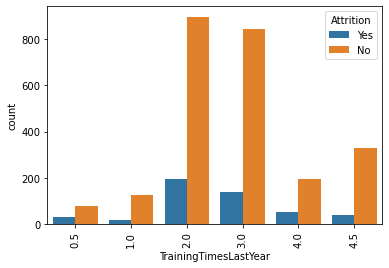

In [ ]:
# What is the effect of trainings on attrition?
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
"Least amount of attrition is observed when training is given once anually."

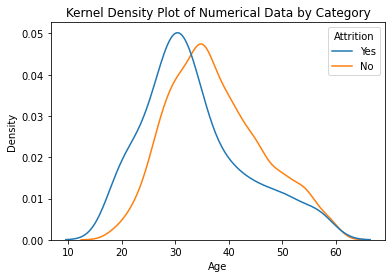

In [ ]:
# What Age groups are most likely to contribute to attrition?
sns.kdeplot(data=data, x='Age', hue='Attrition', common_norm=False)
plt.show()

In [ ]:
"""Age group between 20-30 have the highest contribution to employee attrition"""

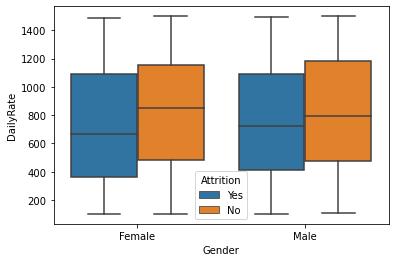

In [ ]:
sns.boxplot(x='Gender',y='DailyRate',hue='Attrition', data=data)

plt.show()

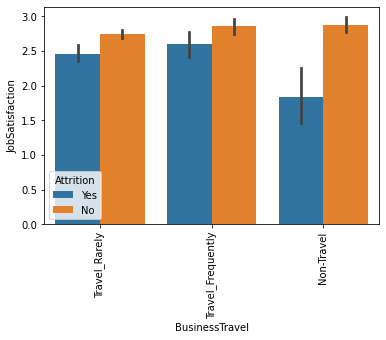

In [ ]:
# How Business travel and job satifaction are a reason for attrition?

sns.barplot(x='BusinessTravel',y='JobSatisfaction',hue='Attrition', data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
""""Non-traveling employees tend to exhibit higher job satisfaction and lower attrition rates.
On the other hand, employees who frequently travel are more prone to attrition,
highlighting the need to explore strategies for improving their job satisfaction.""""

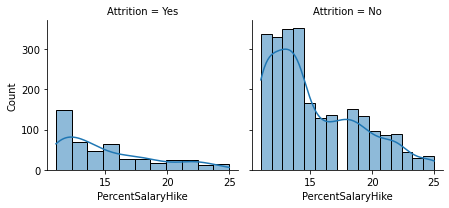

In [ ]:
#Is Salary Hike a significant predictor of attrition?

g = sns.FacetGrid(data, col='Attrition', col_wrap=3)
g.map(sns.histplot, 'PercentSalaryHike', kde=True)
g.set_axis_labels("PercentSalaryHike", "Count")
plt.show()

In [ ]:
"""Percentage Salary hike is a key predictor of attrition, low salary hike showcase high rates of attrition."""

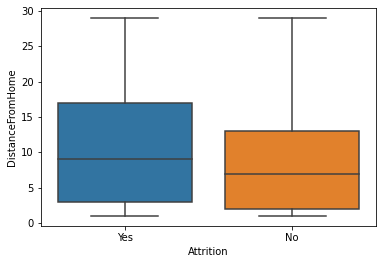

In [ ]:
#Are long distances from home causing higher attrition?

sns.boxplot(x='Attrition',y='DistanceFromHome',data=data)
plt.show()

In [ ]:
""""Based on the data distribution, it appears that individuals living further from their workplace
are at a higher risk of attrition.
To mitigate this, offering housing incentives could be a strategic approach to improve employee retention.""""

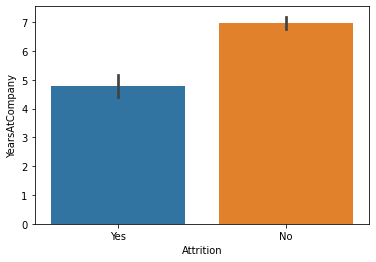

In [ ]:
sns.barplot(x='Attrition',y='YearsAtCompany',data=data)
plt.show()

In [ ]:
"""Longevity at the company appears to be a factor that reduces attrition.
Recognizing and rewarding long-serving employees might help maintain their loyalty."""

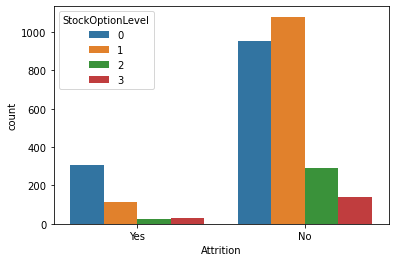

In [ ]:
#Does providing better level of Stock options minimizes attrition?
sns.countplot(x='Attrition',hue='StockOptionLevel',data=data)
plt.show()

In [ ]:
"""Low stock option levels seem to be associated with higher attrition rates.
This suggests that stock options or other incentives could be used to retain employees."""

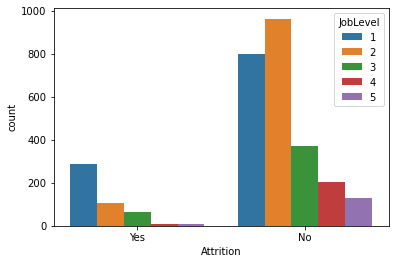

In [ ]:
#How Job levels affect employee attrition
sns.countplot(x='Attrition',hue='JobLevel',data=data)
plt.show()

In [ ]:
"""Employees in lower job levels are more likely to leave the company, whereas people in higher job levels are less
likely to contribute to employee attrition."""

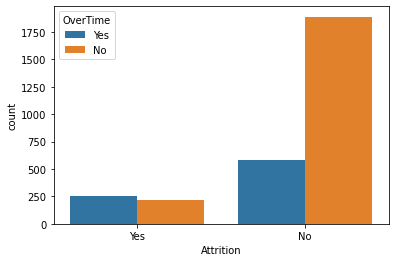

In [ ]:
#Does Overtime increases attrition?

sns.countplot(x='Attrition',hue='OverTime',data=data)
plt.show()

In [ ]:
"""Analysis of attrition patterns has revealed a noteworthy association between elevated attrition rates and increased overtime
allocation to employees.
To enhance employee retention, it is advisable to omit overtime or some level of reduction in over time."""

# Pre-processing of Data

In [ ]:
# Encoding the categorical dataset

In [17]:
def preprocessor(data):
    res_df = data.copy()
    le = preprocessing.LabelEncoder()

    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    return res_df

In [18]:
encoded_data=preprocessor(data)

In [19]:
# Dividing dataset into target and feature.

In [20]:
x = encoded_data.drop(['Attrition'],axis =1)
y = encoded_data['Attrition']

In [21]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,2,1102,2,1,2,1,2,0,94,...,19479,8,1,11,1,0,0.5,1,6,0.0
1,49,1,279,1,8,1,1,3,1,61,...,24907,1,0,23,4,1,3.0,3,10,1.0
2,37,2,1373,1,2,2,4,4,1,92,...,2396,6,1,15,2,0,3.0,3,0,0.0
3,33,1,1392,1,3,4,1,4,0,56,...,23159,1,1,11,3,0,3.0,3,8,3.0
4,27,2,591,1,2,1,3,1,1,40,...,16632,9,0,12,4,1,3.0,3,2,2.0


# Train-Test Split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

# Standardization


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# Model Training

# Logistic Regression


# Grid Search CV

In [24]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_


In [26]:
best_params

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [27]:
lr=LogisticRegression(C=1.0, penalty='l2',solver='newton-cg')

In [28]:
lr.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [29]:
y_predlr=lr.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lrtrain = lr.score(x_train, y_train)
print("Training score: ",lrtrain)

lrtest = lr.score(x_test, y_test)
print("Testing score: ",lrtest)

Training score:  0.8779761904761905
Testing score:  0.8860544217687075


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predlr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       493
           1       0.80      0.39      0.52        95

    accuracy                           0.89       588
   macro avg       0.85      0.69      0.73       588
weighted avg       0.88      0.89      0.87       588



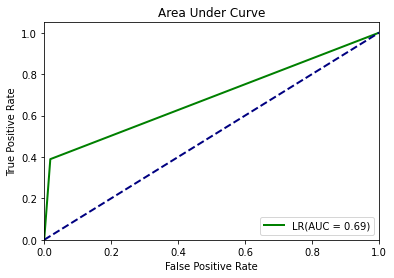

In [32]:
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predlr)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='LR(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Naive Bayes Classifier

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 53.74%
Confusion Matrix:
 [[270 223]
 [ 49  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.55      0.67       493
           1       0.17      0.48      0.25        95

    accuracy                           0.54       588
   macro avg       0.51      0.52      0.46       588
weighted avg       0.74      0.54      0.60       588



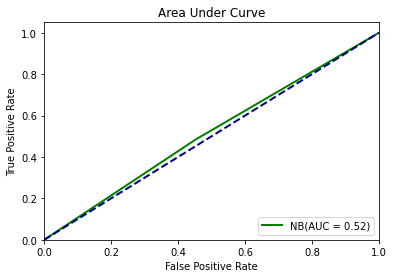

In [34]:
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='NB(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Support Vector Machine

In [44]:
from sklearn.svm import SVC
from sklearn import metrics
#Intializing SVM
svc=SVC(kernel='rbf',gamma=0.01,C=1)
svc.fit(x_train,y_train)
y_pred_svm=svc.predict(x_test)

In [45]:
svcscoretrain = svc.score(x_train, y_train)
print("Training score: ",svcscoretrain)

svcscoretest = svc.score(x_test, y_test)
print("Testing score: ",svcscoretest)

Training score:  1.0
Testing score:  0.9727891156462585


In [ ]:
# Overfitting of the model

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       493
           1       1.00      0.83      0.91        95

    accuracy                           0.97       588
   macro avg       0.98      0.92      0.95       588
weighted avg       0.97      0.97      0.97       588



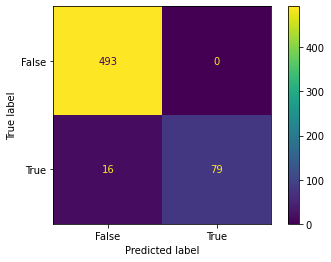

In [47]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
"""Misclassifications are 16"""

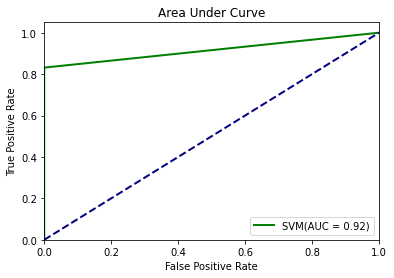

In [40]:
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_svm)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='SVM(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
#
dt = DecisionTreeClassifier(random_state=42, max_depth=40, criterion = "gini",min_samples_split=3,min_samples_leaf=1)
dt.fit(x_train, y_train)

dt_score_train = dt.score(x_train, y_train)
print("Training score: ",dt_score_train)

model_dt_o_score_test = dt.score(x_test, y_test)
print("Testing score: ",model_dt_o_score_test)

y_predict = dt.predict_proba(x_test)[:, 1]

Training score:  0.9982993197278912
Testing score:  0.9523809523809523


In [50]:
y_predict = dt.predict(x_test)

In [51]:
fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predict)
roc_auc_dt = auc(fpr_dt, tpr_dt)

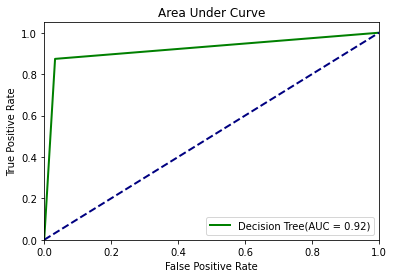

In [52]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       493
           1       0.84      0.87      0.86        95

    accuracy                           0.95       588
   macro avg       0.91      0.92      0.91       588
weighted avg       0.95      0.95      0.95       588



# Confusion Matrix

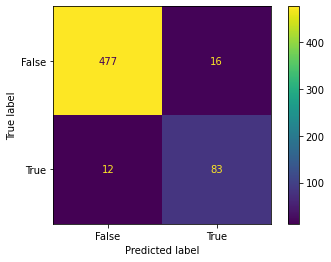

In [54]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
"""Misclassification are 28"""

# RANDOM FOREST

In [55]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [56]:
fit_rf = RandomForestClassifier(random_state=42)

# Calculation of out of bag error rate
It is used to find the optimal number of trees for a random forest model without needing a validation set.

In [ ]:
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 15 #Minimum number of trees
max_estimators = 1000 #Maximum number of trees

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [ ]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

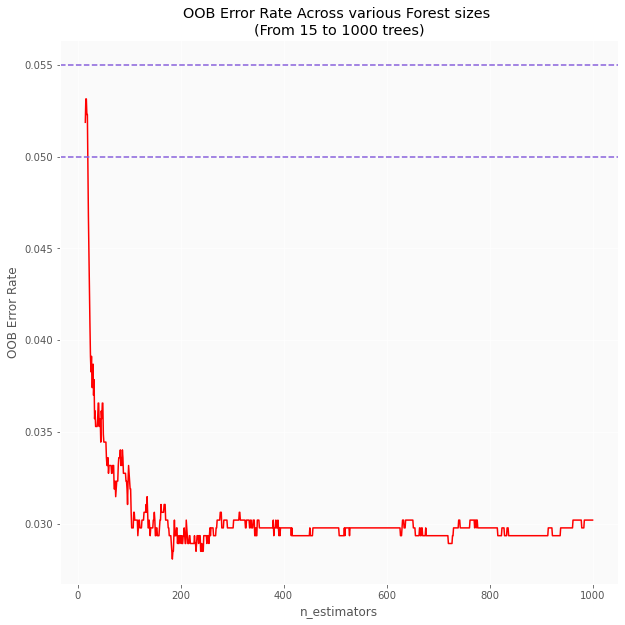

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red') #Plotting Line graph to find optimal number of trees.
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [ ]:
print('OOB Error rate for 523 trees is: {0:.5f}'.format(oob_series[523]))
#After about 500 line graph looks stable hence by hit and try chose 523 trees.

OOB Error rate for 523 trees is: 0.02976


In [ ]:
fit_rf.set_params(n_estimators=523,
                  criterion='gini',
                  max_features='auto',
                  max_depth= 11,
                  bootstrap = True,
                  warm_start=False,
                  oob_score=False)

RandomForestClassifier(max_depth=11, n_estimators=523, random_state=42)

In [ ]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=523, random_state=42)

In [ ]:
y_predrf = fit_rf.predict(x_test)

In [ ]:
accuracy_rf = fit_rf.score(x_train, y_train)

print("Here is our mean accuracy on the train set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the train set:
 0.997


In [ ]:
accuracy_rf = fit_rf.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.976


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       0.97      0.86      0.92        88

    accuracy                           0.98       588
   macro avg       0.98      0.93      0.95       588
weighted avg       0.98      0.98      0.98       588



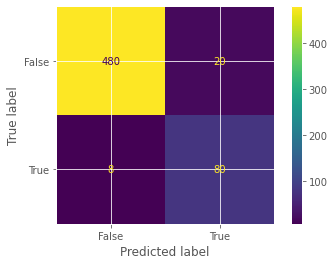

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Misclassifications are 28

# Area Under the Curve

In [ ]:
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

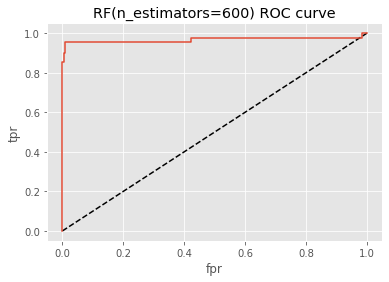

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('RF(n_estimators=600) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predictions_prob)

0.9673636363636364

# K-NEAREST NEIGHBOUR

In [ ]:
#Calculating error for various k neighbours.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i) #Initializing Classifier
    knn.fit(x_train,y_train) #fiting model on x_train and y_train

    train_scores.append(knn.score(x_train,y_train)) #Appending scores to list for various k
    test_scores.append(knn.score(x_test,y_test))

In [ ]:
#Maximum training score with minimum error
max_train_score = max(train_scores)

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
#Maximum testing score

max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 96.5986394557823 % and k = [1]


In [ ]:
knn = KNeighborsClassifier(1)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9659863945578231

In [ ]:
#Graphically checking minimum error.
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

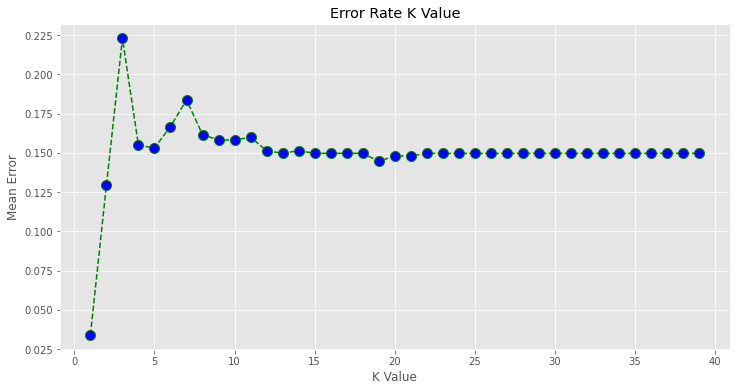

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
#Checking precision and recall
from sklearn.metrics import classification_report
y_pred = knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       500
           1       0.84      0.95      0.89        88

    accuracy                           0.97       588
   macro avg       0.92      0.96      0.94       588
weighted avg       0.97      0.97      0.97       588



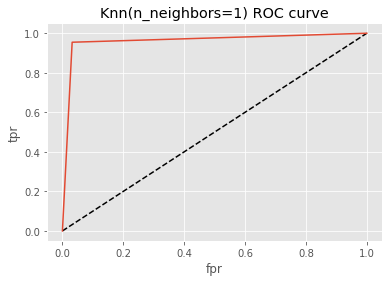

0.9612727272727273

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

# Graphical Comparison of Area under the curve for various ML models

In [ ]:
model_names = ['SVM', 'DT', 'RF','KNN','NB','LR']
auc_values = [0.97, 0.93, 0.96,0.96,0.66,0.66]

<ipython-input-103-8e7fd7efb155>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(model_names, auc_values, color='cgyb')


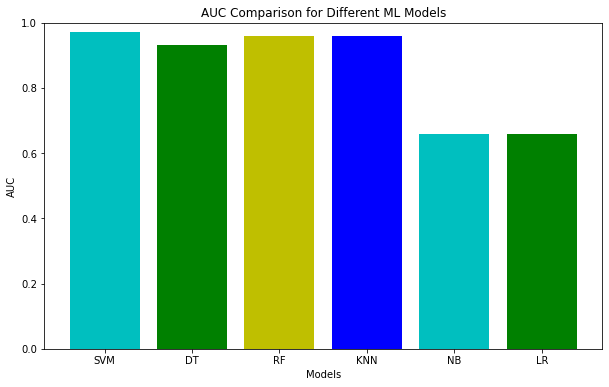

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, auc_values, color='cgyb')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.title('AUC Comparison for Different ML Models')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.show()


# Graphical Representation for Recall of 1 class

In [ ]:
model_names = ['SVM', 'DT', 'RF', 'KNN','Naive Bayes','LR']
recall_values = [0.93, 0.91, 0.86, 0.95, 0.49,0.34]

<ipython-input-105-54702c095d21>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(model_names, recall_values, color='rgb')


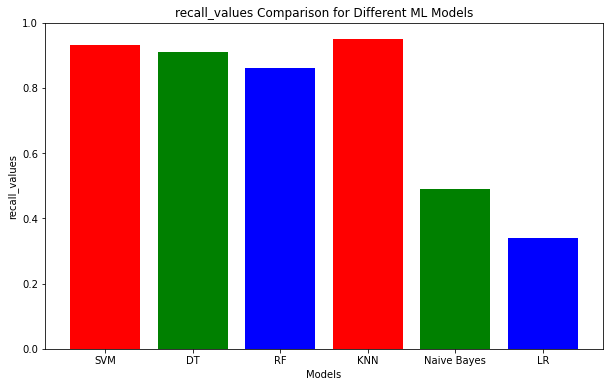

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, recall_values, color='rgb')
plt.xlabel('Models')
plt.ylabel('recall_values')
plt.title('recall_values Comparison for Different ML Models')
plt.ylim(0, 1)
plt.show()